# Contextual Fear Conditioning

In [1]:
import os
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import SigProc
from analysis import graph_analysis_utils as gau
from analysis import analysis_utils as au
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell

In [2]:
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [3]:
paths = list()

paths.append(os.path.join(os.path.expanduser("~"), "Hen_Lab/Mice/CFC/DRD87/drd87_encode_Raw.csv"))
paths.append(os.path.join(os.path.expanduser("~"), "Hen_Lab/Mice/CFC/DRD87/drd87_CSplus_Raw.csv"))
paths.append(os.path.join(os.path.expanduser("~"), "Hen_Lab/Mice/CFC/DRD87/drd87_CSminus_Raw.csv"))

for path in paths:
    if not os.path.exists(path):
        print("This data file does not exist!", file=sys.stderr)

In [4]:
drd87_data = list()

for path in paths:
    data = pd.read_csv(path, header=None)

    _, _, cell_transients_dataframe = SigProc.detect_ca_transients_mossy(data, 2, 0.5, 0.2, 10)
    
    # We drop the first 600 frames (since FPS=20), and the first 30 seconds are not fit for analysis.
    cell_transients_dataframe.drop(cell_transients_dataframe.index[:600], inplace=True)
    cell_transients_dataframe.reset_index(drop=True, inplace=True)
    
    # Rename all the columns from "neuron_x" --> "x". This makes the graphs neater by making sure the neuron names fit into the nodes
    cell_transients_dataframe.columns = [i for i in range(1, len(cell_transients_dataframe.columns)+1)]
    
    drd87_data.append(cell_transients_dataframe)

In [5]:
import plotly
import plotly.graph_objs as go

def plot_network_measures(x, y, **kwargs):
    trace1 = go.Bar(
        x=x,
        y=y,
        text=y,
        textposition = "auto",
        name=kwargs.get("measure1", "1"),
        marker=dict(color=kwargs.get("color", "rgb(0, 255, 0)")),
        opacity=0.7
    )
    data = [trace1]
    layout = go.Layout(
        title = kwargs.get("title", "Graph Title Goes Here"),
    )
    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig)

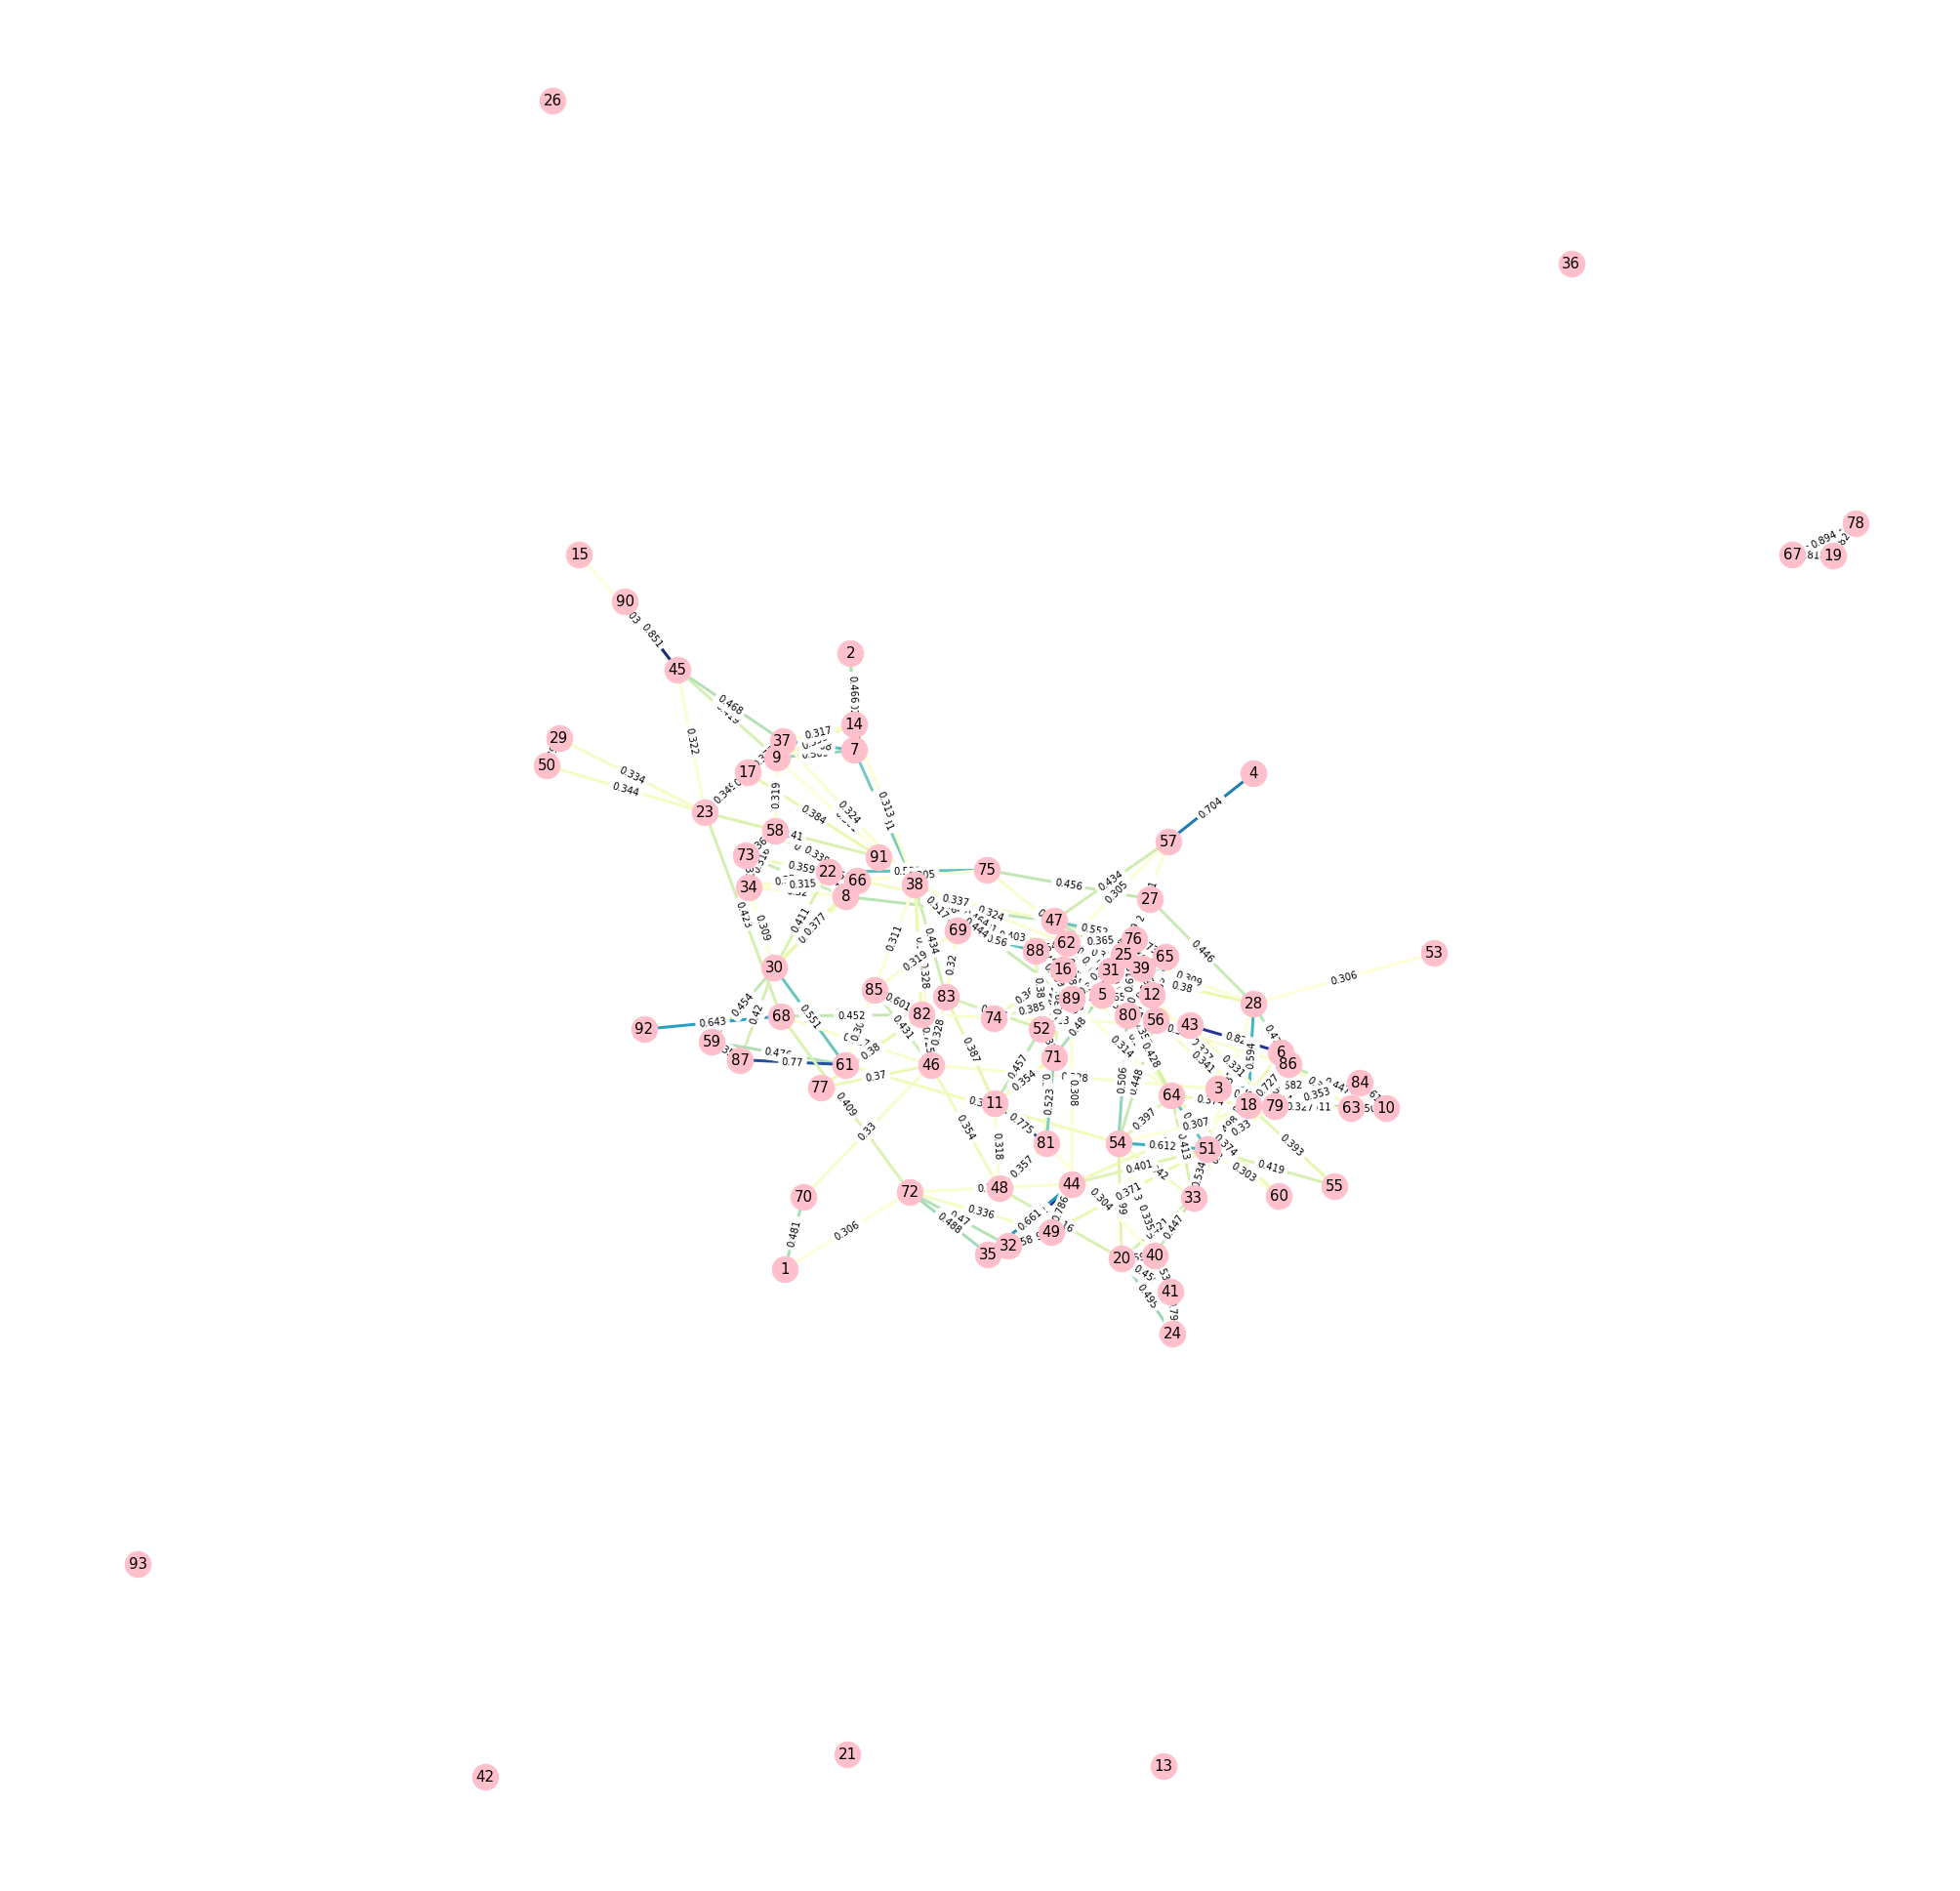

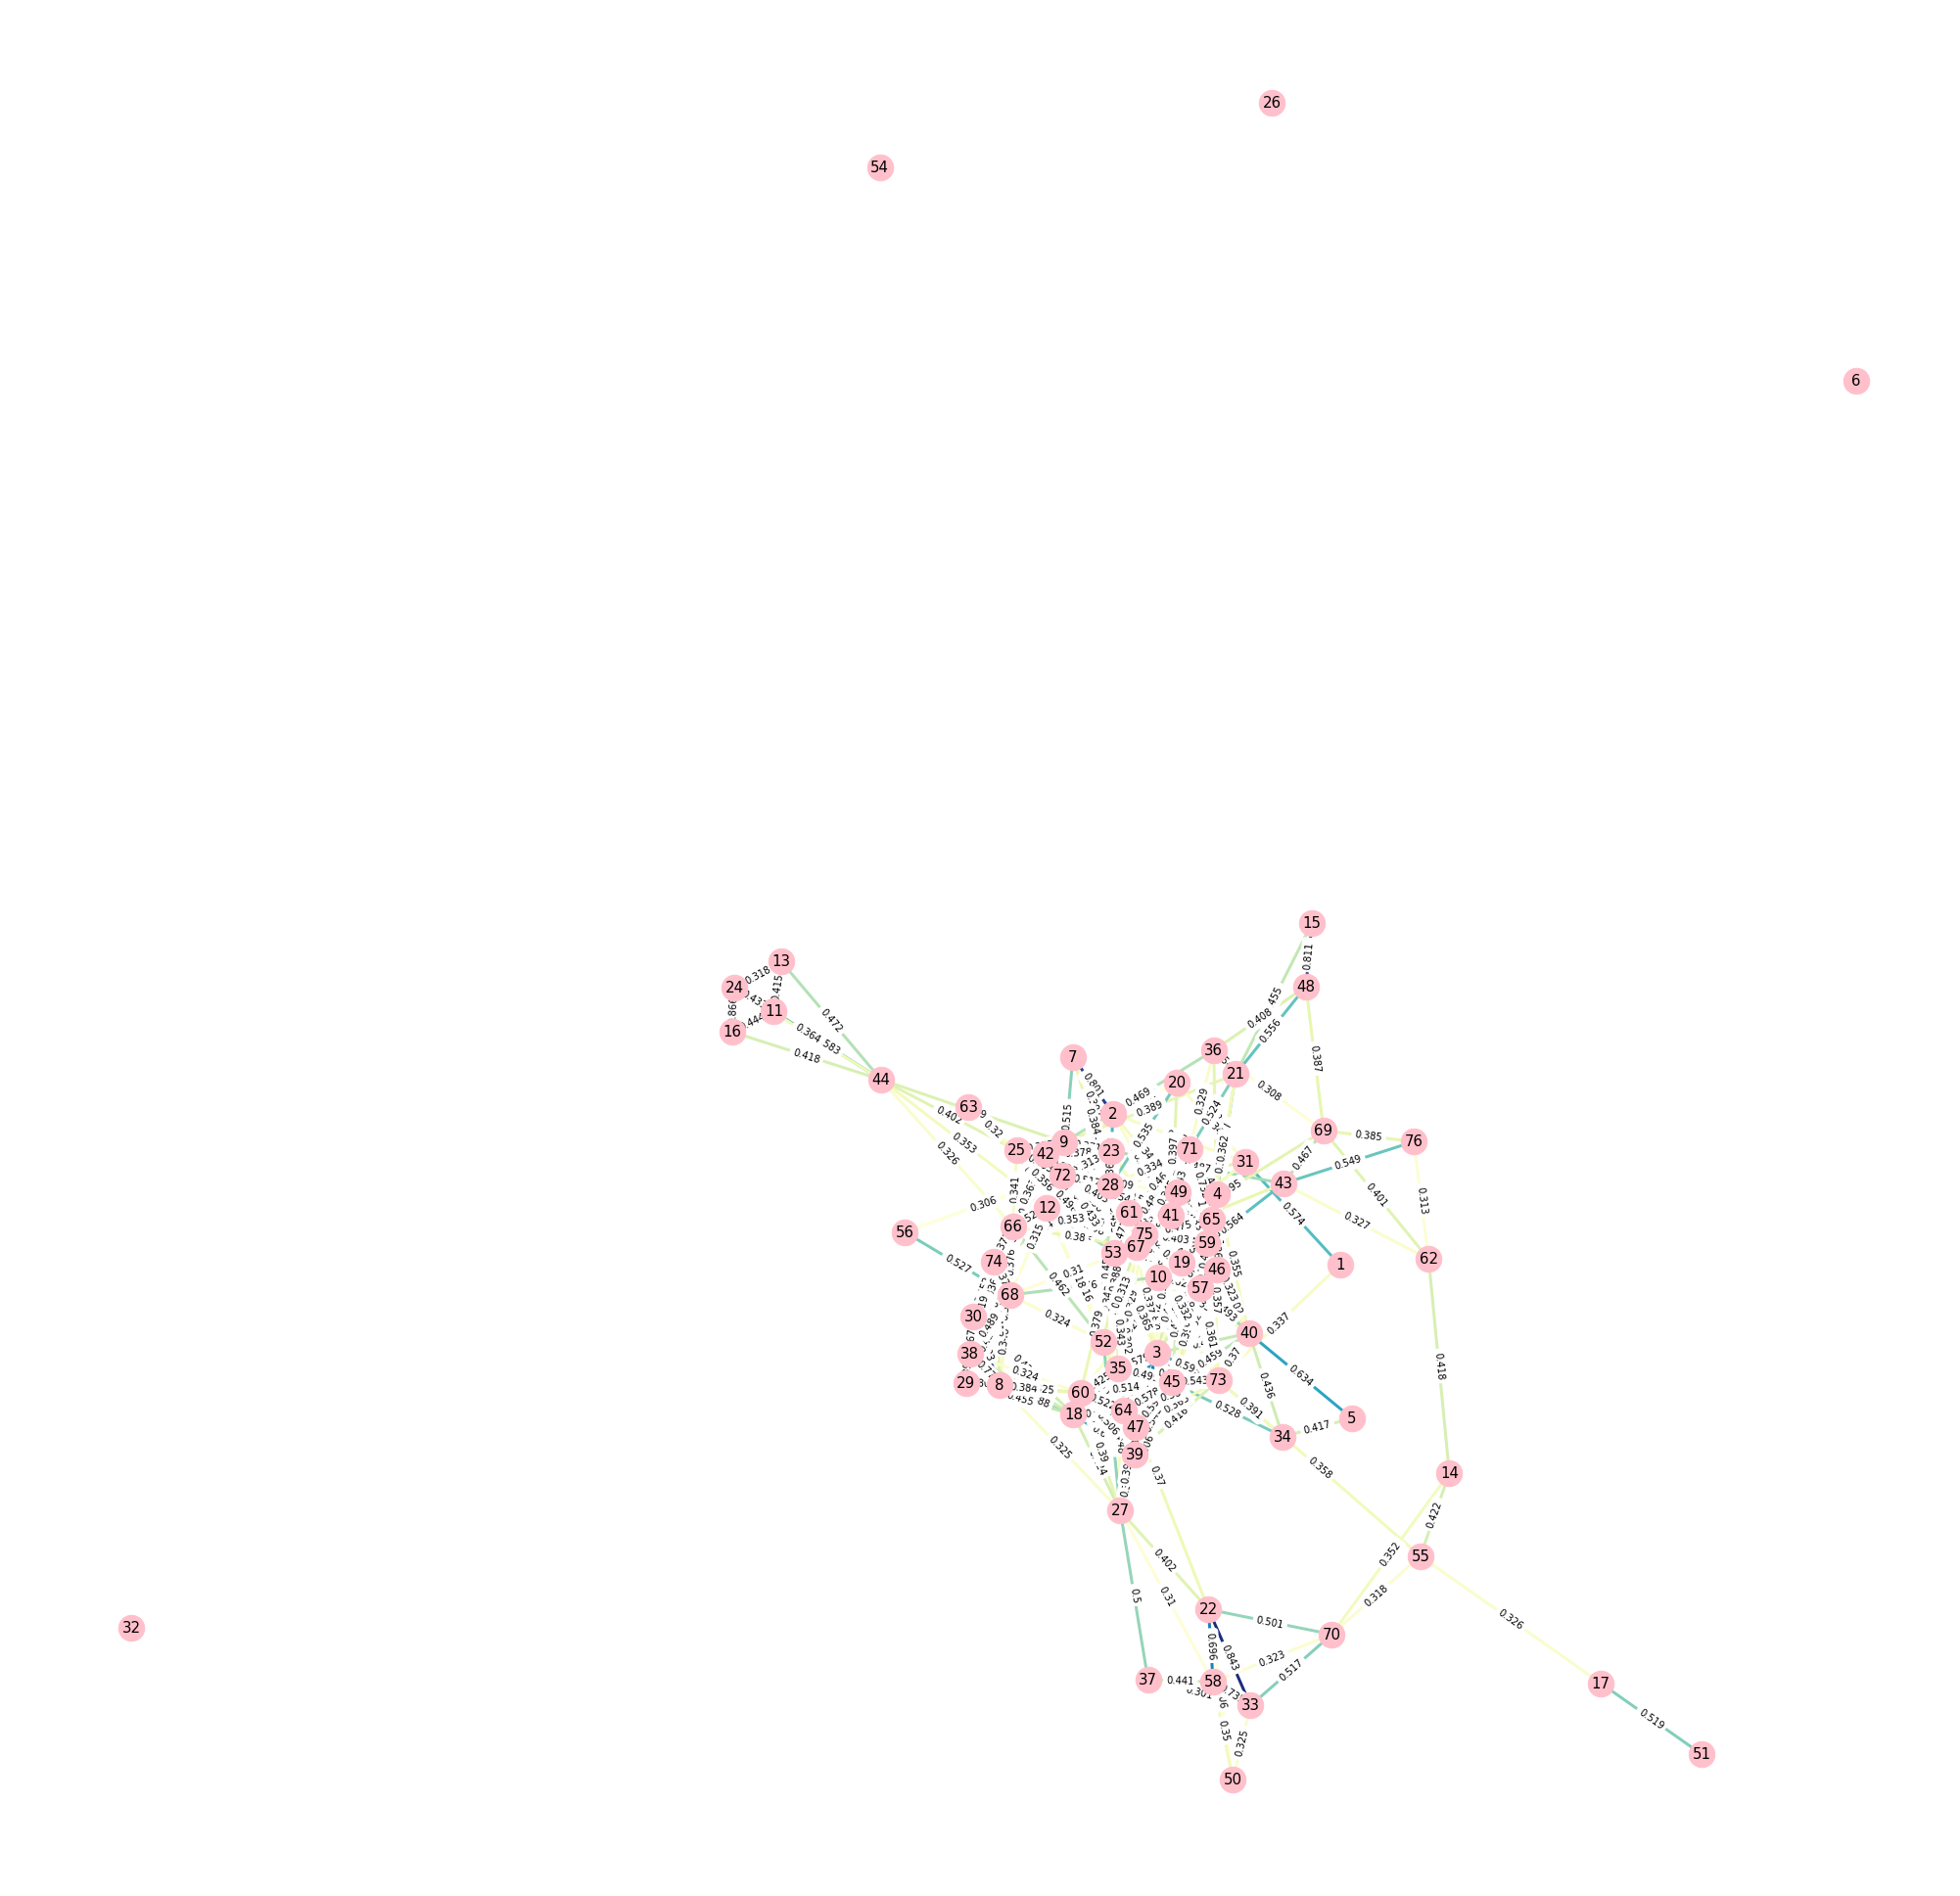

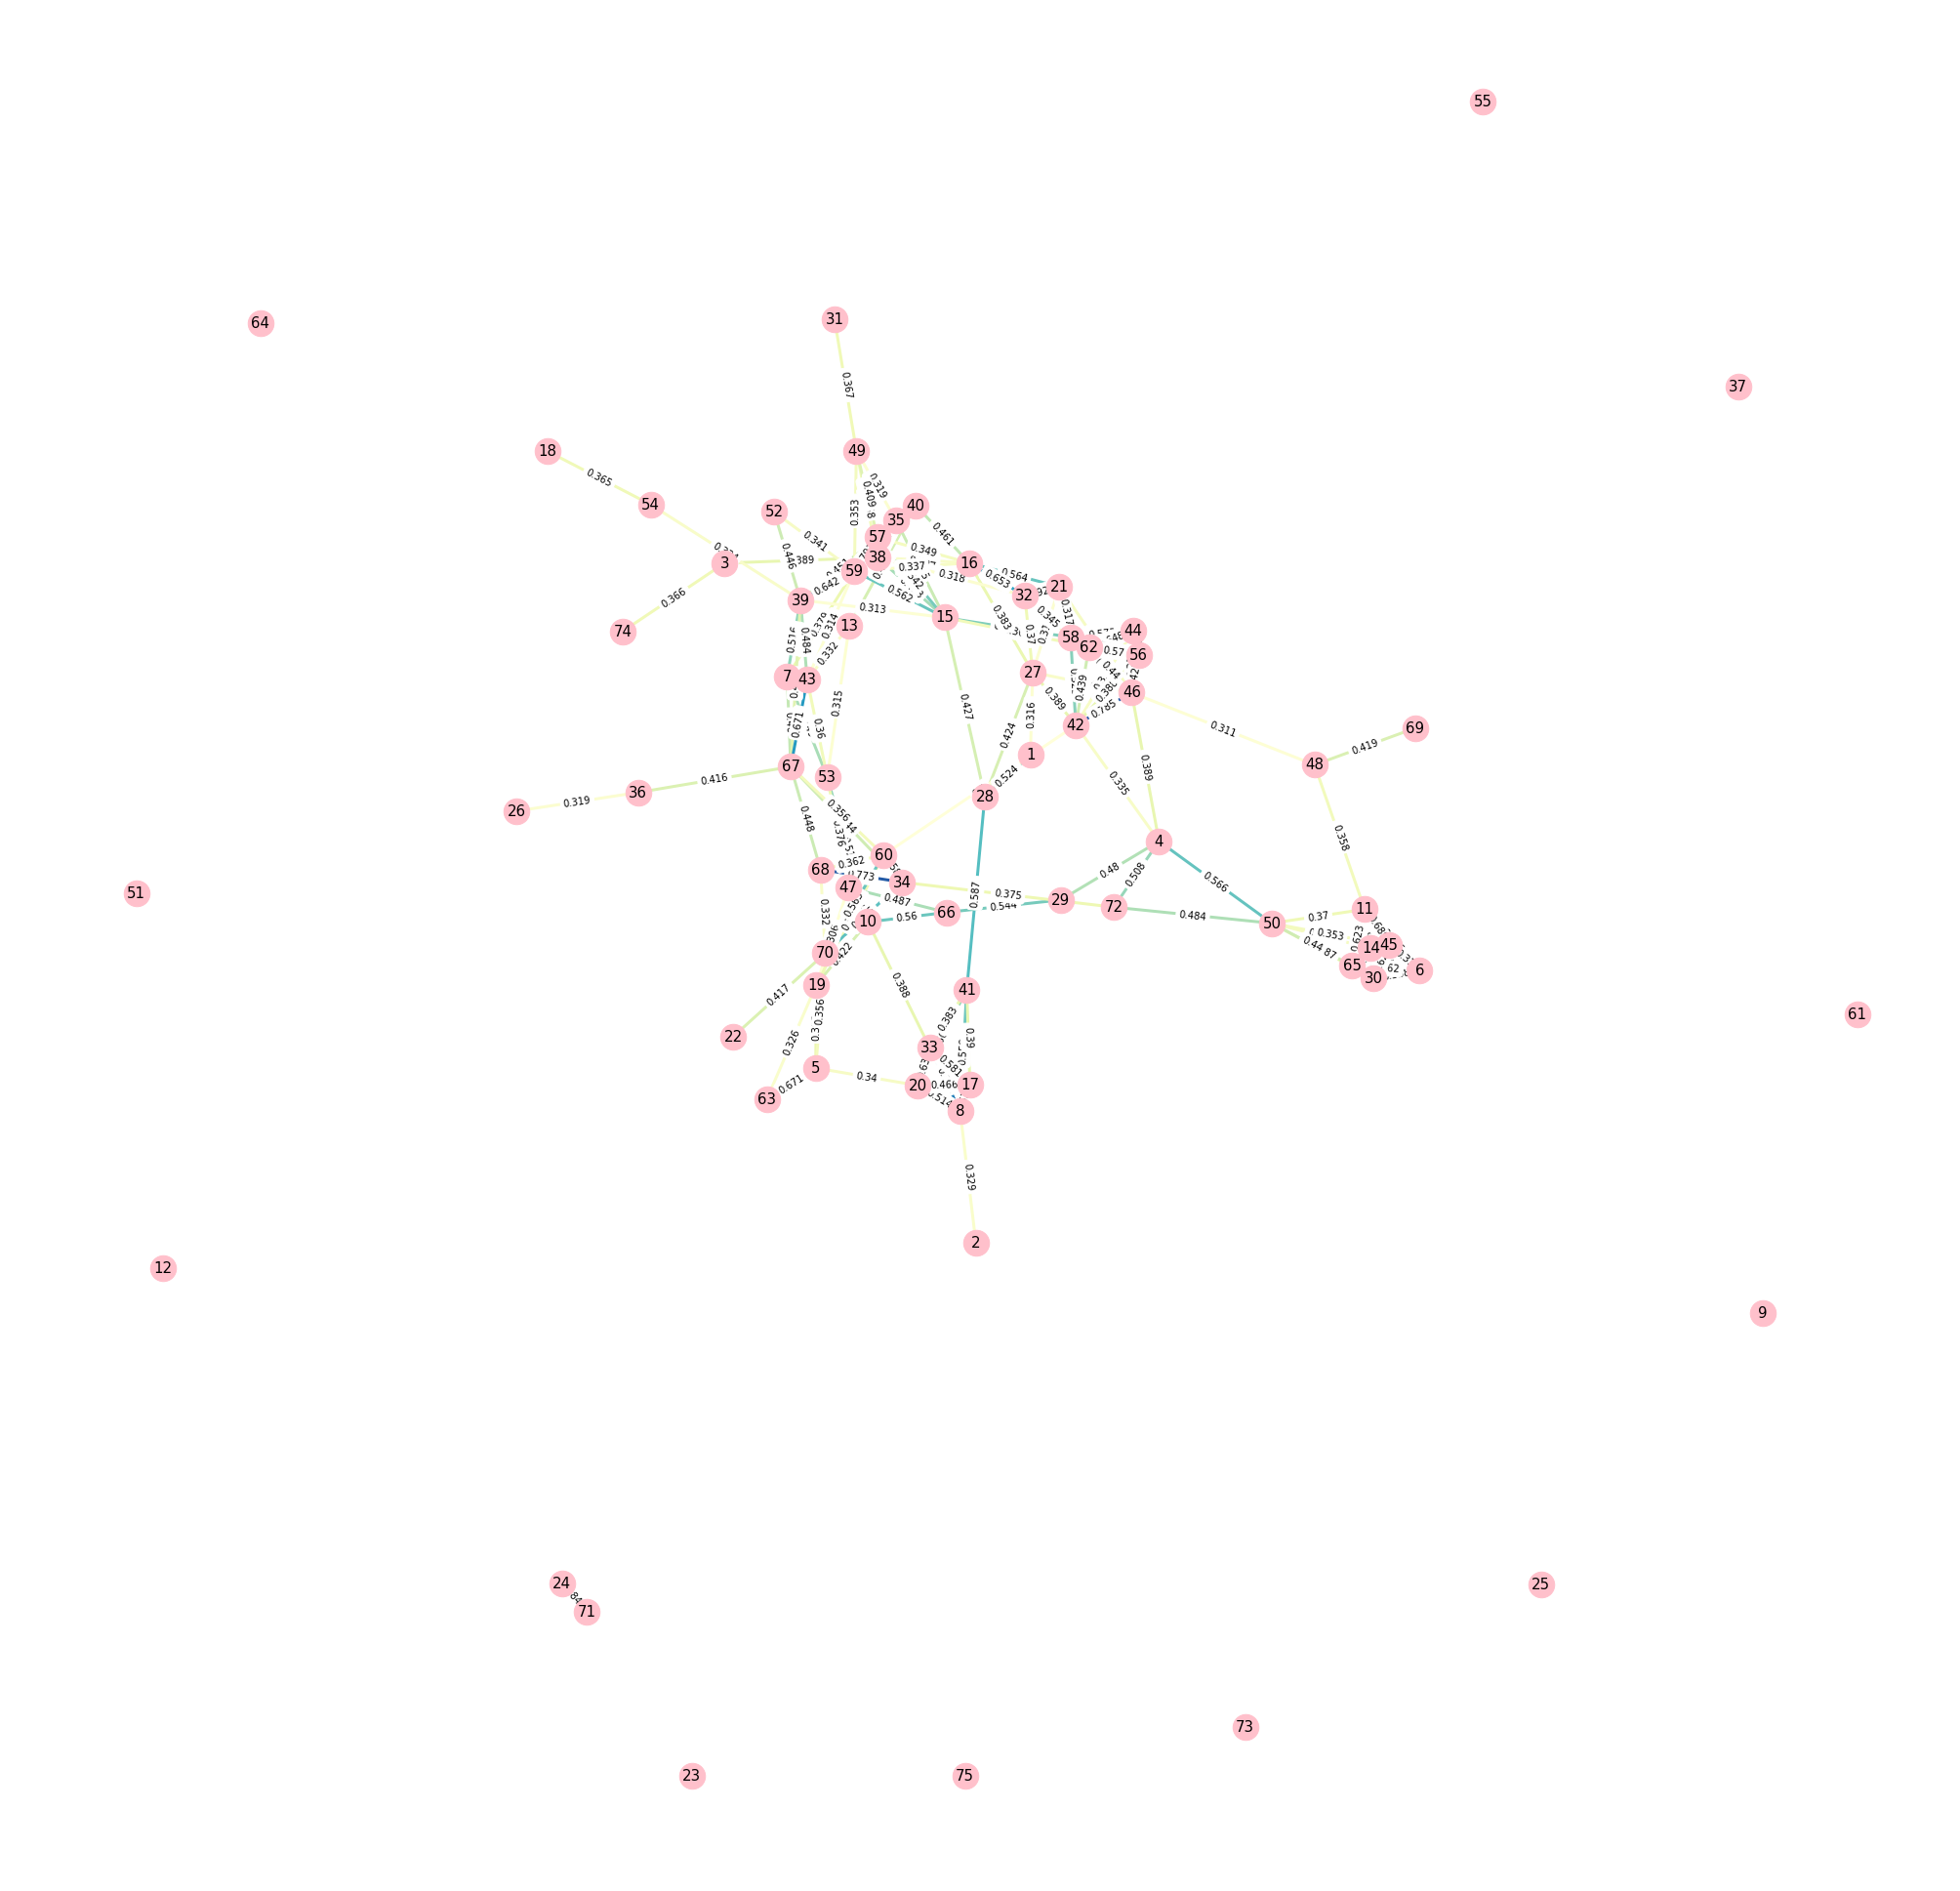

In [12]:
degree_cents = list()
connection_densities = list()
cluster_coefficients = list()
mean_clique_sizes = list()
max_clique_sizes = list()
global_efficiencies = list()
local_efficiencies = list()
mean_betw_cents = list()
mean_load_cents = list()

for df in drd87_data:
    G = gau.create_graph(df)
    degree_cents.append(gau.compute_mean_degree_centrality(G))
    connection_densities.append(gau.compute_connection_density(G))
    cluster_coefficients.append(nx.average_clustering(G))
    mean_clique_sizes.append(gau.compute_mean_clique_size(G))
    max_clique_sizes.append(gau.get_max_clique_size(G))
    global_efficiencies.append(nx.global_efficiency(G))
    local_efficiencies.append(nx.local_efficiency(G))
    mean_betw_cents.append(gau.compute_mean_betweenness_centrality(G))
    mean_load_cents.append(gau.compute_mean_load_centrality(G))
    gau.plot_cluster_graph(G, figsize=(35,35), node_size=700)

In [13]:
x = ["Day 1", "Day 2", "Day 3"]
plot_network_measures(x, degree_cents, title="DRD87 Mean Degree Centrality")
plot_network_measures(x, connection_densities, title="DRD87 Connection Density", color="rgb(0,0,255)")
plot_network_measures(x, cluster_coefficients, title="DRD87 Average Clustering", color="rgb(200,0,0)")
plot_network_measures(x, mean_clique_sizes, title="DRD87 Mean Clique Size", color="rgb(0,200,100)")
plot_network_measures(x, max_clique_sizes, title="DRD87 Max Clique Size", color="rgb(0,0,0)")
plot_network_measures(x, global_efficiencies, title="DRD87 Global Efficiency", color="rgb(100,0,100)")
plot_network_measures(x, local_efficiencies, title="DRD87 Local Efficiency", color="rgb(200,10,60)")
plot_network_measures(x, mean_betw_cents, title="DRD87 Mean Betweeness Centrality", color="rgb(200,0,100)")
plot_network_measures(x, mean_load_cents, title="DRD87 Mean Load Centrality", color="rgb(100,55,150)")